# Importing Important Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv("heart.csv")

# Data Inspection

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
distinct_count = len(dataset.drop_duplicates())
duplicate_count = len(dataset) - distinct_count
print(f'{distinct_count} distinct rows and {duplicate_count} duplicated rows')

302 distinct rows and 723 duplicated rows


##### Dataset containing a lot of duplicates so removed them

In [7]:
dataset=dataset.drop_duplicates()

In [8]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print("number of +ve heart disease",sum(y==1))
print("number of +ve heart disease",sum(y==0))

number of +ve heart disease 164
number of +ve heart disease 138


##### No need for (under/over)sampling

# KNN Algorithm

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
k_vals= range(1,20)
for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

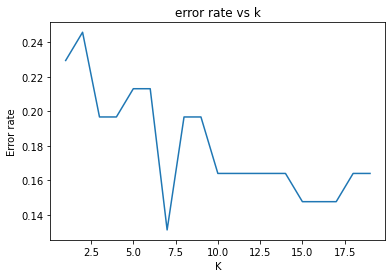

In [12]:
plt.plot(k_vals,error_rate)
plt.title("error rate vs k")
plt.xlabel("K")
plt.ylabel("Error rate")

In [13]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[19  6]
 [ 2 34]]


In [15]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy:.3} %')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy: 86.9 %
KNN model f1_score: 89.5 %
KNN model precision: 85.0 %
KNN model recall: 94.4  %


# SVM with rbf kernel

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  6]
 [ 3 33]]


In [19]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'SVM model Accuracy: {100*accracy:.3} %')
print (f'SVM model f1_score: {100*f1_score:.3} %')
print (f'SVM model precision: {100*precision:.3} %')
print (f'SVM model recall: {100*recall:.3}  %')

SVM model Accuracy: 85.2 %
SVM model f1_score: 88.0 %
SVM model precision: 84.6 %
SVM model recall: 91.7  %


# Logestic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(random_state= 0)
logModel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = logModel.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[20  5]
 [ 4 32]]


In [23]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'logreg model Accuracy: {100*accracy:.3} %')
print (f'logreg model f1_score: {100*f1_score:.3} %')
print (f'logreg model precision: {100*precision:.3} %')
print (f'logreg model recall: {100*recall:.3}  %')

logreg model Accuracy: 85.2 %
logreg model f1_score: 87.7 %
logreg model precision: 86.5 %
logreg model recall: 88.9  %


# Decision Tree

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT_model=DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=DT_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[20  5]
 [ 7 29]]


In [28]:
from sklearn import metrics

y_pred = DT_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Decision Tree model Accuracy: {100*accracy:.3} %')
print (f'Decision Tree model f1_score: {100*f1_score:.3} %')
print (f'Decision Tree model precision: {100*precision:.3} %')
print (f'Decision Tree model recall: {100*recall:.3}  %')

Decision Tree model Accuracy: 80.3 %
Decision Tree model f1_score: 82.9 %
Decision Tree model precision: 85.3 %
Decision Tree model recall: 80.6  %


# Inspecting Feature Importance

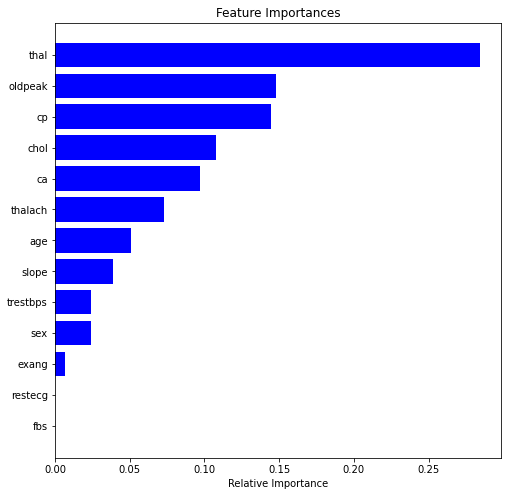

In [29]:
plt.subplots(figsize=(8,8))
features = X.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier() 
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=RF_model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[19  6]
 [ 6 30]]


In [34]:
from sklearn import metrics

y_pred = RF_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Random Forest model Accuracy: {100*accracy:.3} %')
print (f'Random Forest model f1_score: {100*f1_score:.3} %')
print (f'Random Forest model precision: {100*precision:.3} %')
print (f'Random Forest model recall: {100*recall:.3}  %')

Random Forest model Accuracy: 80.3 %
Random Forest model f1_score: 83.3 %
Random Forest model precision: 83.3 %
Random Forest model recall: 83.3  %


# Inspecting Feature Importance

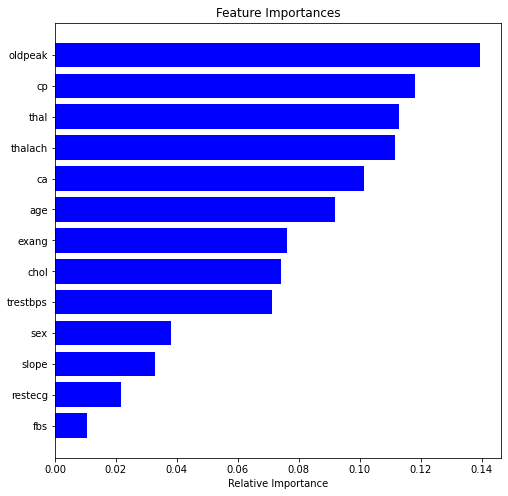

In [35]:
plt.subplots(figsize=(8,8))
features = X.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Ensamble Learning using DT,SVM and RF

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn import svm
# initializing all the model objects with default parameters
model_1 = DecisionTreeClassifier()
model_2 = svm.SVC(probability= False)
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier

final_model = VotingClassifier(
    estimators=[('DT', model_1), ('svc', model_2), ('rf', model_3)],voting= 'hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = final_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[19  6]
 [ 5 31]]


In [38]:
from sklearn import metrics

y_pred = final_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Ensemble model Accuracy: {100*accracy:.3} %')
print (f'Ensemble model f1_score: {100*f1_score:.3} %')
print (f'Ensemble model precision: {100*precision:.3} %')
print (f'Ensemble model recall: {100*recall:.3}  %')

Ensemble model Accuracy: 82.0 %
Ensemble model f1_score: 84.9 %
Ensemble model precision: 83.8 %
Ensemble model recall: 86.1  %


# XGBOOST

In [39]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier() 
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
y_pred=XGB_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[17  8]
 [ 5 31]]


In [42]:
from sklearn import metrics

y_pred = XGB_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'XGB_model Accuracy: {100*accracy:.3} %')
print (f'XGB_model f1_score: {100*f1_score:.3} %')
print (f'XGB_model precision: {100*precision:.3} %')
print (f'XGB_model recall: {100*recall:.3}  %')

XGB_model Accuracy: 78.7 %
XGB_model f1_score: 82.7 %
XGB_model precision: 79.5 %
XGB_model recall: 86.1  %


# Applying all the algorithms again but with the usage of PCA

# KNN

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [44]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
k_vals= range(1,20)
for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

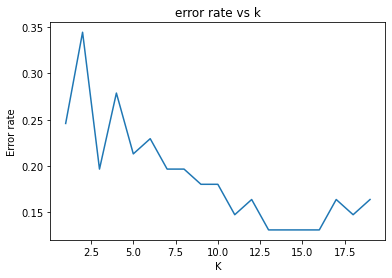

In [45]:
plt.plot(k_vals,error_rate)
plt.title("error rate vs k")
plt.xlabel("K")
plt.ylabel("Error rate")

In [46]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[19  6]
 [ 3 33]]


In [48]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy:.3} %')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy: 85.2 %
KNN model f1_score: 88.0 %
KNN model precision: 84.6 %
KNN model recall: 91.7  %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


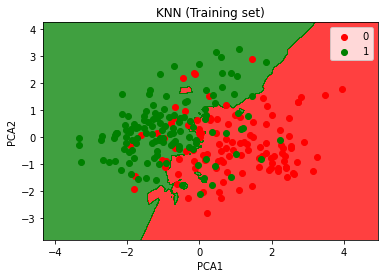

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


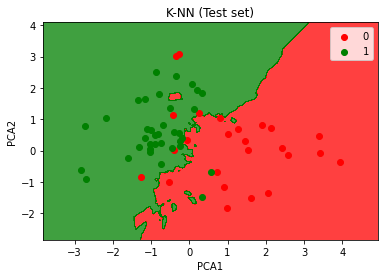

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# SVM

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [52]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(X_train,y_train)

SVC()

In [53]:
y_pred=SVM_model.predict(X_test)

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[16  9]
 [ 2 34]]


In [55]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'SVM_model model Accuracy: {100*accracy:.3} %')
print (f'SVM_model model f1_score: {100*f1_score:.3} %')
print (f'SVM_model model precision: {100*precision:.3} %')
print (f'SVM_model model recall: {100*recall:.3}  %')

SVM_model model Accuracy: 82.0 %
SVM_model model f1_score: 86.1 %
SVM_model model precision: 79.1 %
SVM_model model recall: 94.4  %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


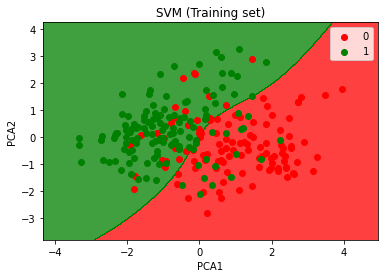

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


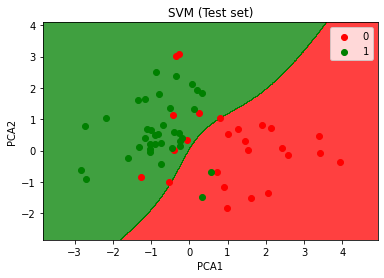

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Logestic Regression

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [59]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(random_state= 0)
logModel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [60]:
y_pred = logModel.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[17  8]
 [ 2 34]]


In [62]:
from sklearn import metrics

y_pred = logModel.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'logictic regression model Accuracy: {100*accracy:.3} %')
print (f'logictic regression model f1_score: {100*f1_score:.3} %')
print (f'logictic regression model precision: {100*precision:.3} %')
print (f'logictic regression model recall: {100*recall:.3}  %')

logictic regression model Accuracy: 83.6 %
logictic regression model f1_score: 87.2 %
logictic regression model precision: 81.0 %
logictic regression model recall: 94.4  %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


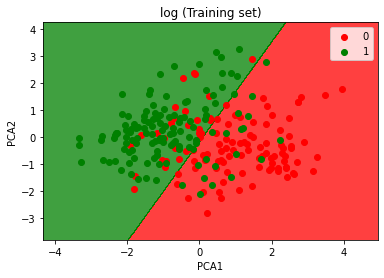

In [63]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('log (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


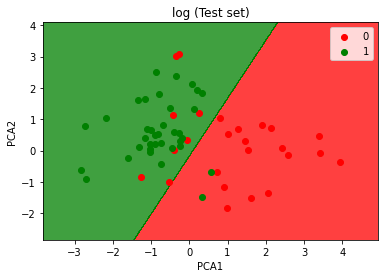

In [64]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('log (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# DT

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [66]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT_model=DecisionTreeClassifier() 
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred=DT_model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16  9]
 [ 8 28]]


In [69]:
from sklearn import metrics

y_pred = DT_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Decision Tree model Accuracy: {100*accracy:.3} %')
print (f'Decision Tree model f1_score: {100*f1_score:.3} %')
print (f'Decision Tree model precision: {100*precision:.3} %')
print (f'Decision Tree model recall: {100*recall:.3}  %')

Decision Tree model Accuracy: 72.1 %
Decision Tree model f1_score: 76.7 %
Decision Tree model precision: 75.7 %
Decision Tree model recall: 77.8  %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


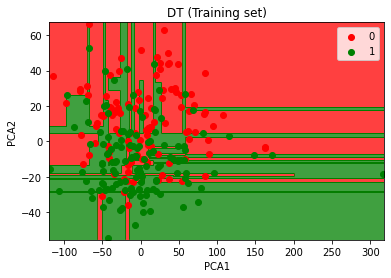

In [70]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, DT_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('DT (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


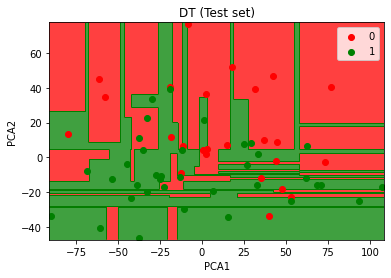

In [71]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, DT_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('DT (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Ensamble

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [73]:
from sklearn.ensemble import VotingClassifier

# initializing all the model objects with default parameters
model_1 = DecisionTreeClassifier()
model_2 = svm.SVC(probability= False)
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier

final_model = VotingClassifier(
    estimators=[('DT', model_1), ('svc', model_2), ('rf', model_3)],voting= 'hard')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
y_pred = final_model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[19  6]
 [10 26]]


In [75]:
from sklearn import metrics

y_pred = final_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'Ensemble model Accuracy: {100*accracy:.3} %')
print (f'Ensemble model f1_score: {100*f1_score:.3} %')
print (f'Ensemble model precision: {100*precision:.3} %')
print (f'Ensemble model recall: {100*recall:.3}  %')

Ensemble model Accuracy: 73.8 %
Ensemble model f1_score: 76.5 %
Ensemble model precision: 81.2 %
Ensemble model recall: 72.2  %


# XGBOOST

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [77]:
from xgboost import XGBClassifier

XGB_model=XGBClassifier() 
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred=XGB_model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15 10]
 [11 25]]


In [80]:
from sklearn import metrics

y_pred = XGB_model.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'XGB_model Accuracy: {100*accracy:.3} %')
print (f'XGB_model f1_score: {100*f1_score:.3} %')
print (f'XGB_model precision: {100*precision:.3} %')
print (f'XGB_model recall: {100*recall:.3}  %')

XGB_model Accuracy: 65.6 %
XGB_model f1_score: 70.4 %
XGB_model precision: 71.4 %
XGB_model recall: 69.4  %
